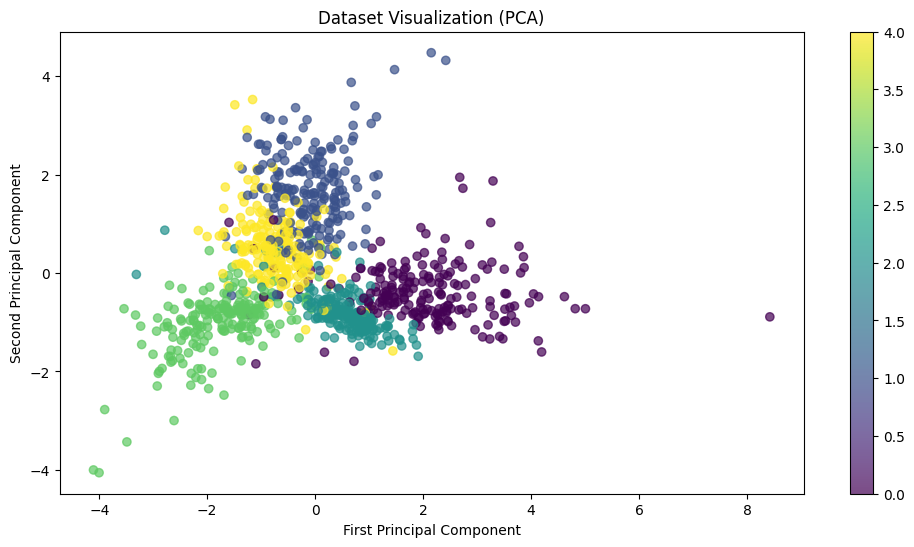

Dataset Characteristics:
Total Samples: 1000
Number of Features: 10
Cluster Distribution:
  Cluster 0: 200 samples
  Cluster 1: 200 samples
  Cluster 2: 200 samples
  Cluster 3: 200 samples
  Cluster 4: 200 samples


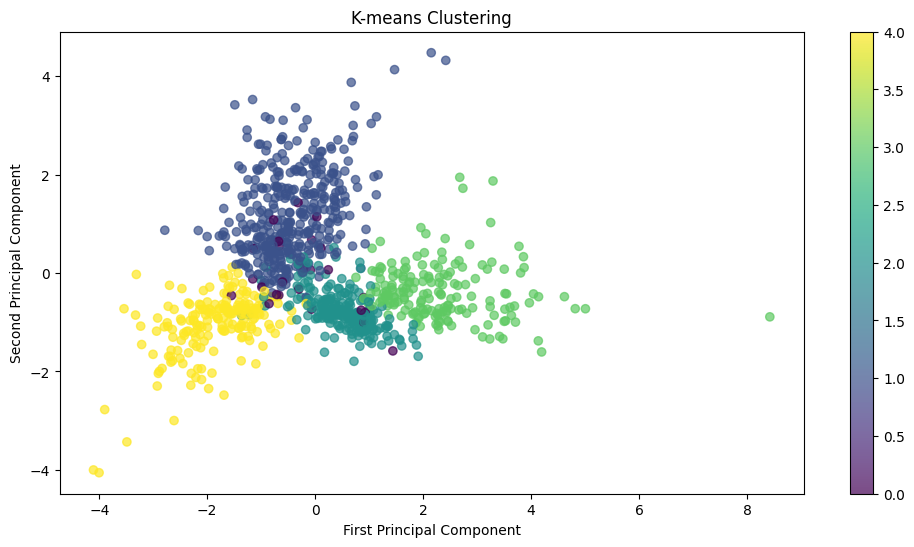

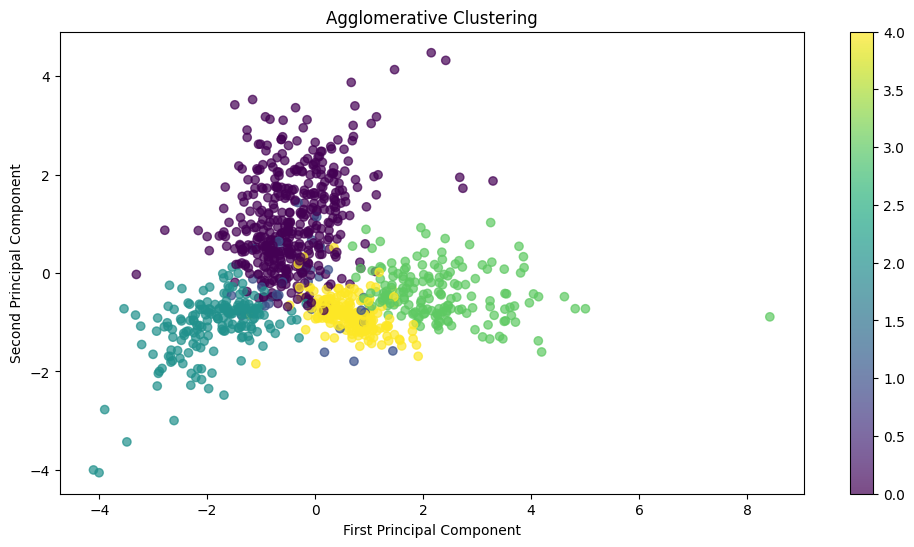

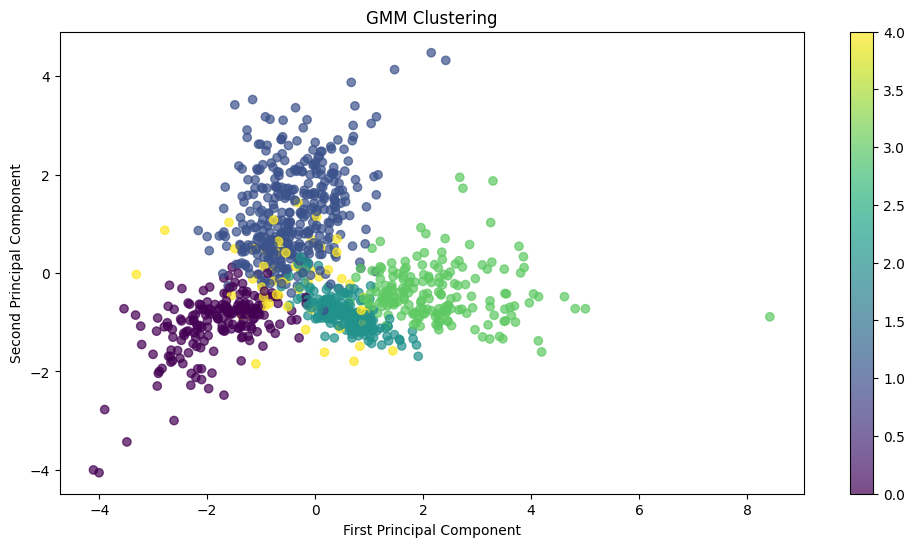


Clustering Method Comparison:

Detailed Metrics:

K-means Clustering:
  adjusted_rand_score: 0.6421
  silhouette_score: 0.2419
  calinski_harabasz_score: 174.4498
  davies_bouldin_score: 1.4234

Agglomerative Clustering:
  adjusted_rand_score: 0.6070
  silhouette_score: 0.2265
  calinski_harabasz_score: 164.1655
  davies_bouldin_score: 1.5241

GMM Clustering:
  adjusted_rand_score: 0.6815
  silhouette_score: 0.2310
  calinski_harabasz_score: 156.6156
  davies_bouldin_score: 2.2971


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def generate_advanced_synthetic_dataset(n_samples=1000, n_features=10, n_clusters=5, 
                                         cluster_complexity=2, random_state=42):
    """
    Generate a highly complex synthetic dataset with multiple challenging characteristics
    
    Args:
        n_samples (int): Total number of samples
        n_features (int): Number of features/dimensions
        n_clusters (int): Number of clusters
        cluster_complexity (float): Factor to increase cluster overlap and non-linearity
        random_state (int): Random seed for reproducibility
    
    Returns:
        tuple: (X, true_labels) - Generated dataset and true cluster labels
    """
    np.random.seed(random_state)
    
    # Base blob clusters
    X, true_labels = make_blobs(n_samples=n_samples, 
                                 n_features=n_features, 
                                 centers=n_clusters, 
                                 cluster_std=[1.0 * cluster_complexity] * n_clusters)
    
    # Add non-linear transformations
    for i in range(n_features):
        if i % 3 == 0:
            # Polynomial transformation
            X[:, i] = X[:, i] ** 2 + np.random.normal(0, 0.5 * cluster_complexity, X.shape[0])
        elif i % 3 == 1:
            # Exponential transformation
            X[:, i] = np.exp(X[:, i] / 3) + np.random.normal(0, 0.5 * cluster_complexity, X.shape[0])
        else:
            # Logarithmic transformation
            X[:, i] = np.log(np.abs(X[:, i]) + 1) + np.random.normal(0, 0.5 * cluster_complexity, X.shape[0])
    
    # Add some random noise
    noise = np.random.normal(0, 0.5 * cluster_complexity, X.shape)
    X += noise
    
    # Create some outliers
    outlier_mask = np.random.random(X.shape[0]) < 0.05
    X[outlier_mask] = np.random.normal(0, 5 * cluster_complexity, X[outlier_mask].shape)
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, true_labels

def visualize_dataset(X, labels):
    """
    Visualize the dataset using dimensionality reduction
    
    Args:
        X (np.ndarray): Input dataset
        labels (np.ndarray): True cluster labels
    """
    from sklearn.decomposition import PCA
    
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create a scatter plot
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title('Dataset Visualization (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
    # Print dataset characteristics
    print("Dataset Characteristics:")
    print(f"Total Samples: {X.shape[0]}")
    print(f"Number of Features: {X.shape[1]}")
    print("Cluster Distribution:")
    unique, counts = np.unique(labels, return_counts=True)
    for cluster, count in zip(unique, counts):
        print(f"  Cluster {cluster}: {count} samples")

def comprehensive_clustering_comparison(X, true_labels, n_clusters=5):
    """
    Comprehensive comparison of clustering methods
    
    Args:
        X (np.ndarray): Input dataset
        true_labels (np.ndarray): True cluster labels
        n_clusters (int): Number of clusters to use
    """
    from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import (
        adjusted_rand_score, 
        silhouette_score, 
        calinski_harabasz_score, 
        davies_bouldin_score
    )
    
    # Clustering algorithms to compare
    clustering_methods = {
        'K-means': KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
        'GMM': GaussianMixture(n_components=n_clusters, random_state=42)
    }
    
    # Results storage
    results = {}
    
    # Perform clustering and evaluate
    for name, clusterer in clustering_methods.items():
        if name == 'GMM':
            # GMM requires fit_predict method
            predicted_labels = clusterer.fit_predict(X)
        else:
            predicted_labels = clusterer.fit_predict(X)
        
        # Compute metrics
        results[name] = {
            'labels': predicted_labels,
            'adjusted_rand_score': adjusted_rand_score(true_labels, predicted_labels),
            'silhouette_score': silhouette_score(X, predicted_labels),
            'calinski_harabasz_score': calinski_harabasz_score(X, predicted_labels),
            'davies_bouldin_score': davies_bouldin_score(X, predicted_labels)
        }
        
        # Visualization
        plt.figure(figsize=(12, 6))
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter)
        plt.title(f'{name} Clustering')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.show()
    
    # Print comparison results
    print("\nClustering Method Comparison:")
    print("\nDetailed Metrics:")
    for name, metrics in results.items():
        print(f"\n{name} Clustering:")
        for metric, value in metrics.items():
            if metric != 'labels':
                print(f"  {metric}: {value:.4f}")

# Main execution
if __name__ == '__main__':
    # Generate complex dataset
    X, true_labels = generate_advanced_synthetic_dataset(
        n_samples=1000, 
        n_features=10, 
        n_clusters=5, 
        cluster_complexity=2
    )
    
    # Visualize dataset
    visualize_dataset(X, true_labels)
    
    # Perform comprehensive clustering comparison
    comprehensive_clustering_comparison(X, true_labels)

In [18]:

custom_labels = custom_gmm_clustering(X, n_components=3)
custom_silhouette = silhouette_score(StandardScaler().fit_transform(X), custom_labels)

print("\nCustom GMM Clustering:")
print(f"  Silhouette Score: {custom_silhouette:.4f}")


Custom GMM Clustering:
  Silhouette Score: 0.6824


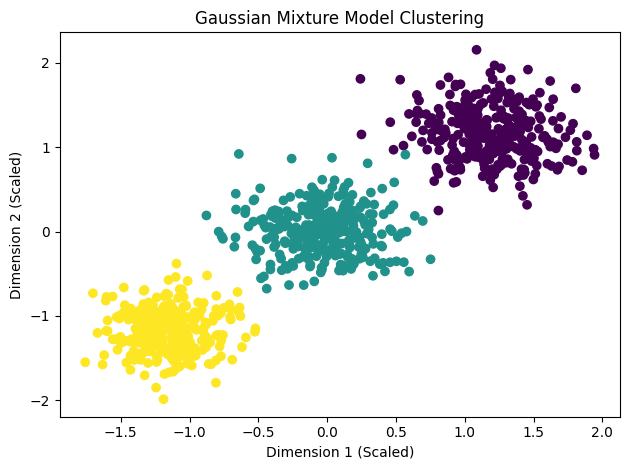

In [19]:
# plt.subplot(1, 2, 2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=custom_labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Dimension 1 (Scaled)')
plt.ylabel('Dimension 2 (Scaled)')

plt.tight_layout()
plt.show()

In [5]:
def generate_advanced_synthetic_dataset(n_samples=1000, n_features=10, n_clusters=5, 
                                         cluster_complexity=2, random_state=42):
    """
    Generate a highly complex synthetic dataset with multiple challenging characteristics
    
    Args:
        n_samples (int): Total number of samples
        n_features (int): Number of features/dimensions
        n_clusters (int): Number of clusters
        cluster_complexity (float): Factor to increase cluster overlap and non-linearity
        random_state (int): Random seed for reproducibility
    
    Returns:
        tuple: (X, true_labels) - Generated dataset and true cluster labels
    """
    np.random.seed(random_state)
    
    # Base blob clusters
    X, true_labels = make_blobs(n_samples=n_samples, 
                                 n_features=n_features, 
                                 centers=n_clusters, 
                                 cluster_std=[1.0 * cluster_complexity] * n_clusters)
    
    # Add non-linear transformations
    for i in range(n_features):
        if i % 3 == 0:
            # Polynomial transformation
            X[:, i] = X[:, i] ** 2 + np.random.normal(0, 0.5 * cluster_complexity, X.shape[0])
        elif i % 3 == 1:
            # Exponential transformation
            X[:, i] = np.exp(X[:, i] / 3) + np.random.normal(0, 0.5 * cluster_complexity, X.shape[0])
        else:
            # Logarithmic transformation
            X[:, i] = np.log(np.abs(X[:, i]) + 1) + np.random.normal(0, 0.5 * cluster_complexity, X.shape[0])
    
    # Add some random noise
    noise = np.random.normal(0, 0.5 * cluster_complexity, X.shape)
    X += noise
    
    # Create some outliers
    outlier_mask = np.random.random(X.shape[0]) < 0.05
    X[outlier_mask] = np.random.normal(0, 5 * cluster_complexity, X[outlier_mask].shape)
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, true_labels

def visualize_dataset(X, labels):
    """
    Visualize the dataset using dimensionality reduction
    
    Args:
        X (np.ndarray): Input dataset
        labels (np.ndarray): True cluster labels
    """
    from sklearn.decomposition import PCA
    
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create a scatter plot
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title('Dataset Visualization (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
    # Print dataset characteristics
    print("Dataset Characteristics:")
    print(f"Total Samples: {X.shape[0]}")
    print(f"Number of Features: {X.shape[1]}")
    print("Cluster Distribution:")
    unique, counts = np.unique(labels, return_counts=True)
    for cluster, count in zip(unique, counts):
        print(f"  Cluster {cluster}: {count} samples")

In [8]:
from sklearn.datasets import make_blobs
X, true_labels = generate_advanced_synthetic_dataset(
    n_samples=1000, 
    n_features=10, 
    n_clusters=5, 
    cluster_complexity=2
)

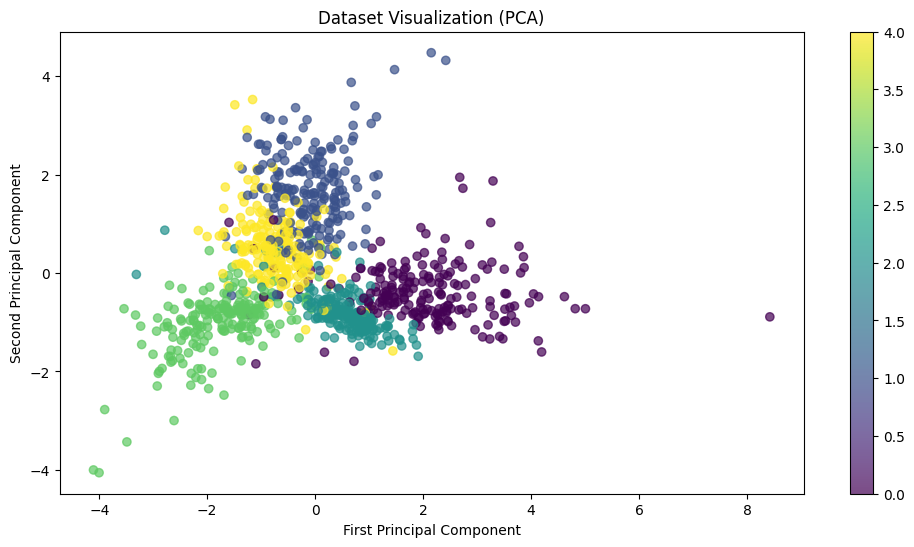

Dataset Characteristics:
Total Samples: 1000
Number of Features: 10
Cluster Distribution:
  Cluster 0: 200 samples
  Cluster 1: 200 samples
  Cluster 2: 200 samples
  Cluster 3: 200 samples
  Cluster 4: 200 samples


In [ ]:
visualize_dataset(X, true_labels)